In [2]:
# Import all libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('train.csv')

# Check data
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Shape: (9800, 18)

Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales']

First 5 rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
# HYPOTHESIS 1 - T-TEST
# Do Consumer and Corporate segments have
# significantly different average sales?

consumer_sales = df[df['Segment'] == 'Consumer']['Sales']
corporate_sales = df[df['Segment'] == 'Corporate']['Sales']

t_stat, p_value = stats.ttest_ind(consumer_sales, corporate_sales)

print("T-TEST RESULTS")
print("=" * 50)
print("Consumer Avg Sales:  $" + str(round(consumer_sales.mean(), 2)))
print("Corporate Avg Sales: $" + str(round(corporate_sales.mean(), 2)))
print("T-Statistic: " + str(round(t_stat, 4)))
print("P-Value: " + str(round(p_value, 4)))
print("-" * 50)

if p_value < 0.05:
    print("RESULT: Significant difference exists!")
    print("Consumer and Corporate sales ARE different")
else:
    print("RESULT: No significant difference found")
    print("Consumer and Corporate sales are similar")

print("=" * 50)

T-TEST RESULTS
Consumer Avg Sales:  $225.07
Corporate Avg Sales: $233.15
T-Statistic: -0.5896
P-Value: 0.5555
--------------------------------------------------
RESULT: No significant difference found
Consumer and Corporate sales are similar


In [6]:

# HYPOTHESIS 2 - CHI-SQUARE TEST
# Is there a relationship between
# Region and Customer Segment?

contingency_table = pd.crosstab(df['Region'], df['Segment'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("=" * 50)
print("CHI-SQUARE TEST RESULTS")
print("=" * 50)
print("\nContingency Table:")
print(contingency_table)
print(f"\nChi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("-" * 50)
if p < 0.05:
    print("RESULT: Significant relationship exists! ✅")
    print("Region and Segment ARE related")
else:
    print("RESULT: No significant relationship ❌")
    print("Region and Segment are independent")
print("=" * 50)

CHI-SQUARE TEST RESULTS

Contingency Table:
Segment  Consumer  Corporate  Home Office
Region                                   
Central      1188        661          428
East         1444        850          491
South         831        500          267
West         1638        942          560

Chi-Square Statistic: 4.2075
P-Value: 0.6486
Degrees of Freedom: 6
--------------------------------------------------
RESULT: No significant relationship ❌
Region and Segment are independent


/tmp/ipython-input-3342285232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Segment'].isin(['Consumer','Corporate'])],


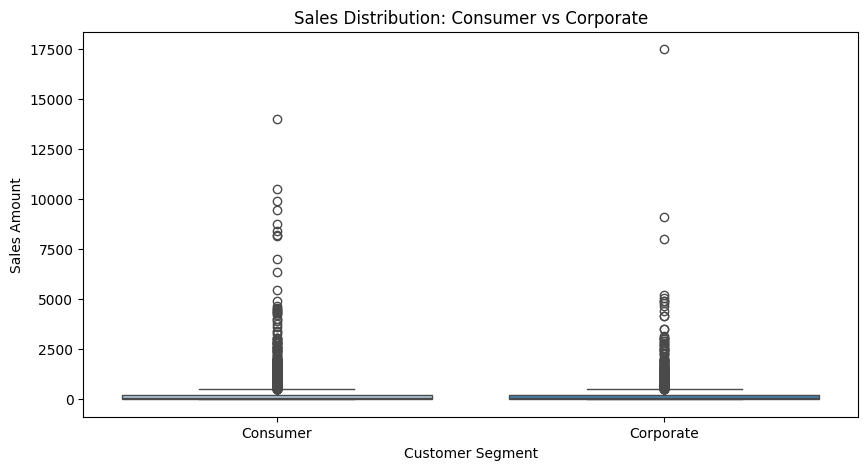

In [7]:
# Visualize T-Test - Sales Distribution by Segment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[df['Segment'].isin(['Consumer','Corporate'])],
            x='Segment', y='Sales', palette='Blues')
plt.title('Sales Distribution: Consumer vs Corporate')
plt.xlabel('Customer Segment')
plt.ylabel('Sales Amount')
plt.show()

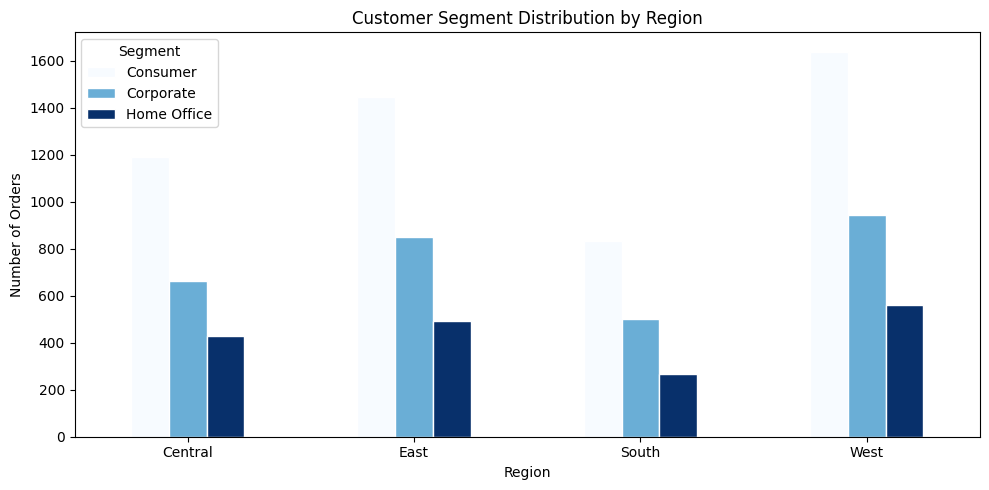

In [8]:
# Visualize Chi-Square - Region vs Segment
contingency_table = pd.crosstab(df['Region'], df['Segment'])
contingency_table.plot(kind='bar', figsize=(10,5),
                       colormap='Blues', edgecolor='white')
plt.title('Customer Segment Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()